In [318]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB


In [319]:
df = pd.read_csv('male.txt', delim_whitespace=True)
df.head()

,name
0,Aamir
1,Aaron
2,Abbey
3,Abbie
4,Abbot


In [320]:
male_data = df['name'].values
y = np.ones([male_data.shape[0],1])
male_data.shape,y.shape

((2943,), (2943, 1))

In [321]:
def syllable_count(word):
    word = word.lower()
    count = 0
    vowels = "aeiouy"
    if word[0] in vowels:
        count += 1
    for index in range(1, len(word)):
        if word[index] in vowels and word[index - 1] not in vowels:
            count += 1
    if word.endswith("e"):
        count -= 1
    if count == 0:
        count += 1
    return count

In [322]:
def count_vowels(string):
    vowels = "aeiouAEIOU"
    vowel_count = 0

    for char in string:
        if char in vowels:
            vowel_count += 1

    return vowel_count

In [323]:
X = []
for data in male_data:
    # Features
    features = []
    # length
    features.append(len(data))
    # vowel count
    features.append(count_vowels(data))
    #consonant count
    features.append(len(data)-count_vowels(data))
    #first letter
    features.append(ord(data[0]))
    #last letter
    features.append(ord(data[-1]))
    # syllables
    features.append(syllable_count(data))
    # unique letters
    unique_letters_count = len(set(data.lower()))
    features.append(unique_letters_count)
    
    X.append(features)

In [324]:
df = pd.read_csv('female.txt', delim_whitespace=True)
df = df[:2943]

In [325]:
female_data = df['name'].values
y = np.vstack([y, np.zeros([female_data.shape[0],1])])
female_data.shape,y.shape

((2943,), (5886, 1))

In [326]:
for data in female_data:
    # Features
    features = []
    # length
    features.append(len(data))
    # vowel count
    features.append(count_vowels(data))
    #consonant count
    features.append(len(data)-count_vowels(data))
    #first letter
    features.append(ord(data[0]))
    #last letter
    features.append(ord(data[-1]))
    features.append(syllable_count(data))
    unique_letters_count = len(set(data.lower()))
    features.append(unique_letters_count)
    X.append(features)
X= np.array(X)
X.shape

(5886, 7)

In [327]:
X.shape,y.shape

((5886, 7), (5886, 1))

In [328]:
model = MultinomialNB()

In [329]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [330]:
model.fit(X_train,y_train.ravel())

MultinomialNB()

In [340]:
model.score(X_test,y_test)

0.6186309830159548

In [344]:
name = input()
features = []
# length
features.append(len(name))
# vowel count
features.append(count_vowels(name))
#consonant count
features.append(len(name)-count_vowels(name))
#first letter
features.append(ord(name[0]))
#last letter
features.append(ord(name[-1]))
features.append(syllable_count(name))
unique_letters_count = len(set(name.lower()))
features.append(unique_letters_count)

y_pred = "Male" if model.predict(np.array(features).reshape(1,7)) else "Female"
y_pred

 Joe


'Male'

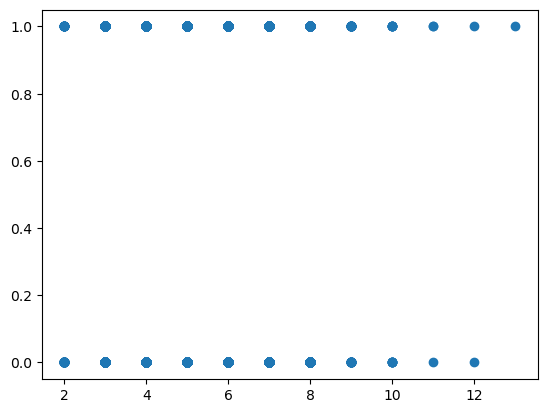

In [290]:
plt.scatter(X[:,6],y)